In [2]:
# Importing the libraries and packages
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error


In [5]:
# Loading the dataset
data = pd.read_csv("ToyotaCorolla.csv")
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
# renaming the columns
data=data.rename({ "R&D Spend":'R&D',"Marketing Spend":'marketing',"Administration":"administration","State":"state","Profit":"profit"},axis=1)
print(data.head(5))

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  �TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1     

In [7]:
# checking the missing values
data.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [8]:
# printing basic info about data
print(data.columns)
print("Data types---")
print("==========================")
print(data.dtypes)
print("==========================")
print("Info---")
print(data.info())
print("==========================")


Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')
Data types---
Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears           

In [9]:
print("Average Price:")
print(data["Price"].mean())
print("==========================")
print("Average Accumulated Kilometers on odometer:")
print(data["KM"].mean())
print("==========================")
print("Average Cylinder Volume in cubic centimeters:")
print(data["cc"].mean())
print("==========================")
print("Average Quarterly road tax in EUROs:")
print(data["Quarterly_Tax"].mean())
print("==========================")
print("Average Weight in Kilograms:")
print(data["Weight"].mean())
print("==========================")

Average Price:
10730.824512534818
Average Accumulated Kilometers on odometer:
68533.25974930362
Average Cylinder Volume in cubic centimeters:
1576.8558495821726
Average Quarterly road tax in EUROs:
87.12256267409471
Average Weight in Kilograms:
1072.4596100278552


In [10]:
lb= LabelEncoder()
data["Fuel_Type"]=lb.fit_transform(data["Fuel_Type"])

In [11]:
print(data.head())
print(data.dtypes)

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  �TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM  Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986          1  90          1  ...            1   
1         10      2002  72937          1  90          1  ...            1   
2          9      2002  41711          1  90          1  ...            0   
3          7      2002  48000          1  90          0  ...            0   
4          3      2002  38500          1  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                

## Exploratory Data Analysis

<AxesSubplot:>

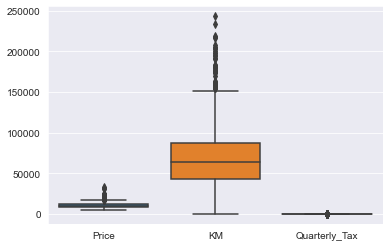

In [12]:
# checking the outliers
sns.boxplot(data=data.loc[:, ['Price', 'KM','Quarterly_Tax']],palette="tab10")

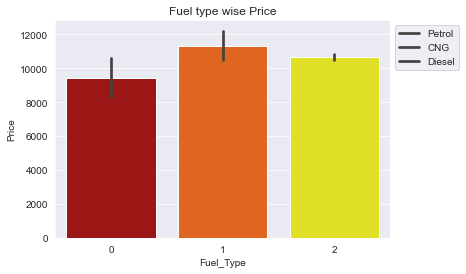

In [13]:
# fuel type wise price
ax=sns.barplot(x=data["Fuel_Type"],y=data["Price"],data=data,palette="hot")
plt.title("Fuel type wise Price")
ax.legend( bbox_to_anchor=(1,1),labels=["Petrol","CNG","Diesel"])

Text(0.5, 1.0, 'Fuel type wise Price percentages')

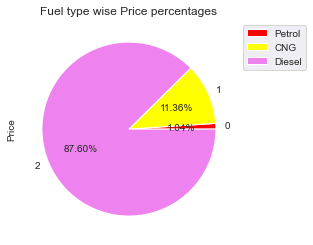

In [14]:
ax=data.groupby(["Fuel_Type"])["Price"].sum().plot(kind="pie",colors=['red','yellow','violet'],autopct='%.2f%%')
ax.legend( bbox_to_anchor=(1,1),labels=["Petrol","CNG","Diesel"])
plt.title("Fuel type wise Price percentages")

Text(0.5, 1.0, 'Accumulated Kilometers on odometer VS Price')

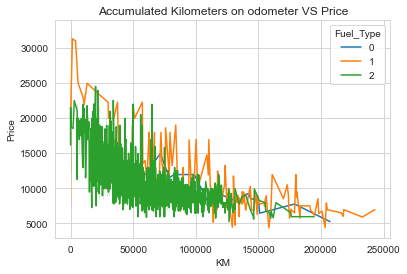

In [15]:
sns.set_style("whitegrid")
sns.lineplot(x="KM",y="Price",data=data,hue="Fuel_Type",palette='tab10')
plt.title("Accumulated Kilometers on odometer VS Price")

Text(0.5, 1.0, 'Quarterly road tax in EUROs VS Price')

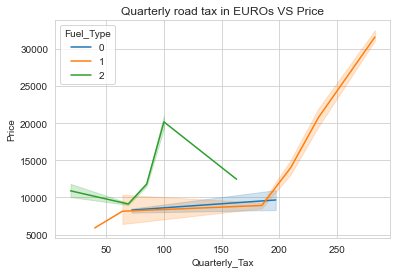

In [16]:
sns.set_style("whitegrid")
sns.lineplot(x="Quarterly_Tax",y="Price",data=data,hue="Fuel_Type",palette='tab10')
plt.title("Quarterly road tax in EUROs VS Price")

Text(0.5, 1.0, 'Weight in Kilograms VS Price')

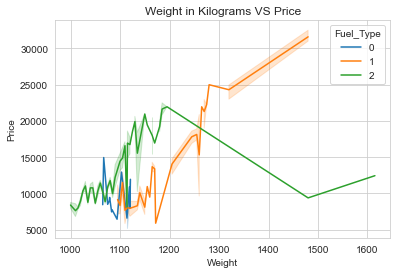

In [17]:
sns.set_style("whitegrid")
sns.lineplot(x="Weight",y="Price",data=data,hue="Fuel_Type",palette='tab10')
plt.title("Weight in Kilograms VS Price")

Text(0.5, 1.0, 'Cylinder Volume in cubic centimeters VS Price')

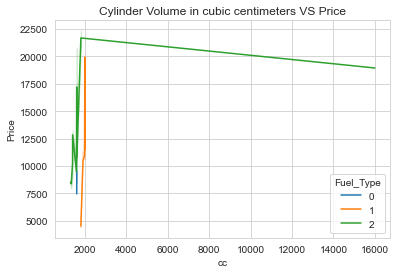

In [18]:
sns.set_style("whitegrid")
sns.lineplot(x="cc",y="Price",data=data,hue="Fuel_Type",palette='tab10')
plt.title("Cylinder Volume in cubic centimeters VS Price")

<AxesSubplot:>

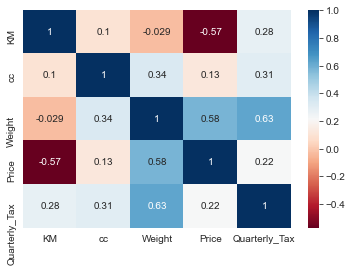

In [19]:
sns.heatmap(data[["KM","cc","Weight","Price","Quarterly_Tax"]].corr(),annot=True,cmap="RdBu")

## Linear Regression

### Prediction model for predicting price

In [20]:
# multiple linear regression--
df=data[["KM","cc","Weight","Quarterly_Tax","Price"]]
print(df.head())

      KM    cc  Weight  Quarterly_Tax  Price
0  46986  2000    1165            210  13500
1  72937  2000    1165            210  13750
2  41711  2000    1165            210  13950
3  48000  2000    1165            210  14950
4  38500  2000    1170            210  13750


In [21]:
df.shape

(1436, 5)

In [22]:
# train test split
training,testing=train_test_split(df,test_size=0.2)
training.head()

,KM,cc,Weight,Quarterly_Tax,Price
637,121626,1300,1050,69,7995
298,41000,1600,1075,85,13995
1174,94447,1600,1050,69,7250
240,58798,1600,1075,85,10950
551,41700,1400,1025,69,10750


In [23]:
testing.head()

,KM,cc,Weight,Quarterly_Tax,Price
496,58530,1600,1075,85,11750
1414,42186,1600,1050,69,7500
166,5459,1600,1130,85,19950
711,91333,1600,1050,69,8250
272,48052,1900,1105,185,13500


In [24]:
training.shape,testing.shape

((1148, 5), (288, 5))

In [25]:
# defining
x_train=training[["KM","cc","Weight","Quarterly_Tax"]]
y_train=training["Price"]
x_test=testing[["KM","cc","Weight","Quarterly_Tax"]]
y_test=testing["Price"]

In [26]:
model = LinearRegression()
print(model)

LinearRegression()


In [29]:
model_train=model.fit(x_train,y_train)
print("Model training is completed")
print(model_train)

Model training is completed
LinearRegression()


In [30]:
print(model.coef_)
print(model.intercept_)

[-0.05535487 -0.03469673 34.56353547  4.68238424]
-22910.157682621873


In [44]:
model_train.score(x_train,y_train)

0.6264743463447623

<AxesSubplot:xlabel='KM', ylabel='Price'>

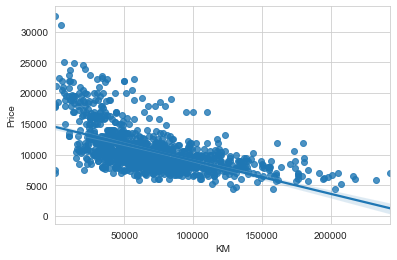

In [31]:
sns.regplot(x="KM",y="Price",data=training)

<AxesSubplot:xlabel='cc', ylabel='Price'>

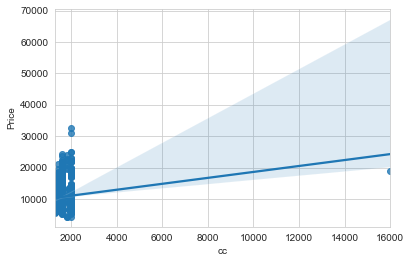

In [32]:
sns.regplot(x="cc",y="Price",data=training)

<AxesSubplot:xlabel='Weight', ylabel='Price'>

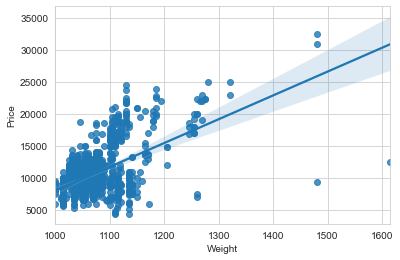

In [33]:
sns.regplot(x="Weight",y="Price",data=training)

<AxesSubplot:xlabel='Quarterly_Tax', ylabel='Price'>

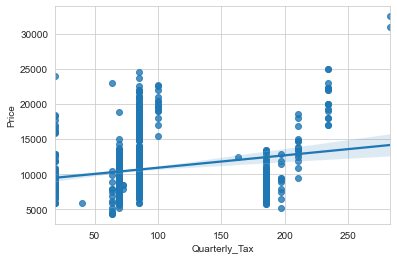

In [34]:
sns.regplot(x="Quarterly_Tax",y="Price",data=training)

In [36]:
pred_price=model_train.predict(x_test)
pred_price

array([11348.2105812 , 11313.92396236, 16186.9430797 ,  8593.39840549,
       13422.95432712,  9283.64945141,  9426.21529106, 10841.82336379,
        9643.31476737, 10436.5159524 , 10613.07601487, 14951.55403414,
        8997.23410398, 12937.50390253, 10058.47625589, 15251.24527399,
        8314.79800408, 11174.28559494,  8392.29796647,  6629.13480214,
       12217.66944791, 11493.94050016, 10517.9210017 ,  5049.08238048,
        9760.89165211,  3829.9499819 ,  6183.66147825,  8697.52154164,
        8216.40152756, 15092.41260101,  7873.1762552 , 10048.14643021,
       13717.64864542, 10861.9577564 , 16016.56080481, 10199.63052716,
        5636.89884456,  9169.25885353, 14905.6099193 , 10476.09468097,
       13078.89936978,  8215.82287039,  9646.97070483,  5560.86325577,
       12282.22207265, 11982.55622479, 11881.42455612, 11859.41233752,
       10764.65980454,  9536.99897071, 12371.35517648,  8310.20355028,
        6382.91321081,  6995.69093305,  9860.40313901, 12572.62546612,
      

In [37]:
testing["pred_price"]=pred_price
testing

<ipython-input-37-60f1e46b7c8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing["pred_price"]=pred_price


,KM,cc,Weight,Quarterly_Tax,Price,pred_price
496,58530,1600,1075,85,11750,11348.210581
1414,42186,1600,1050,69,7500,11313.923962
166,5459,1600,1130,85,19950,16186.943080
711,91333,1600,1050,69,8250,8593.398405
272,48052,1900,1105,185,13500,13422.954327
...,...,...,...,...,...,...
169,1,1400,1065,19,17795,13940.342114
394,126110,1600,1055,85,9950,6916.058086
968,48738,1600,1055,85,9950,11198.974711
803,73376,1600,1070,85,10950,10353.594576


In [38]:
testing["Error"]=testing["Price"]-testing["pred_price"]
testing

<ipython-input-38-8a9376ad0a10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing["Error"]=testing["Price"]-testing["pred_price"]


,KM,cc,Weight,Quarterly_Tax,Price,pred_price,Error
496,58530,1600,1075,85,11750,11348.210581,401.789419
1414,42186,1600,1050,69,7500,11313.923962,-3813.923962
166,5459,1600,1130,85,19950,16186.943080,3763.056920
711,91333,1600,1050,69,8250,8593.398405,-343.398405
272,48052,1900,1105,185,13500,13422.954327,77.045673
...,...,...,...,...,...,...,...
169,1,1400,1065,19,17795,13940.342114,3854.657886
394,126110,1600,1055,85,9950,6916.058086,3033.941914
968,48738,1600,1055,85,9950,11198.974711,-1248.974711
803,73376,1600,1070,85,10950,10353.594576,596.405424


In [39]:
mltpl_r2 = r2_score(testing['Price'],testing['pred_price'])
mltpl_r2

0.7101742103305064

<AxesSubplot:xlabel='KM', ylabel='Price'>

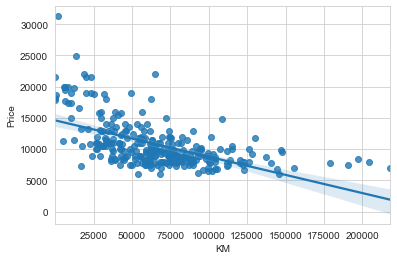

In [40]:
sns.regplot(x="KM",y="Price",data=testing)

<AxesSubplot:xlabel='cc', ylabel='Price'>

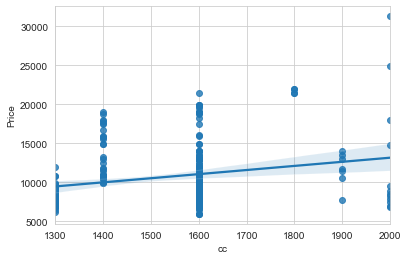

In [41]:
sns.regplot(x="cc",y="Price",data=testing)

<AxesSubplot:xlabel='Weight', ylabel='Price'>

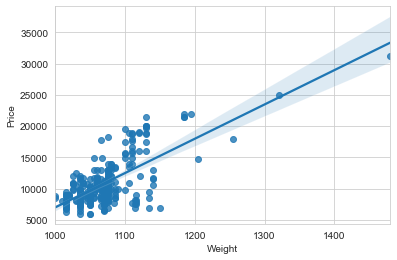

In [42]:
sns.regplot(x="Weight",y="Price",data=testing)

<AxesSubplot:xlabel='Weight', ylabel='Price'>

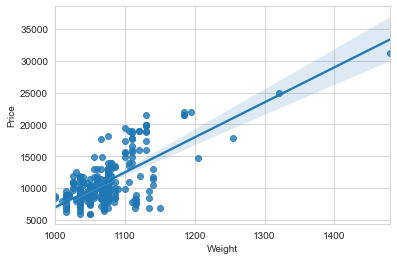

In [43]:
sns.regplot(x="Weight",y="Price",data=testing)

## Ridge Regression

In [45]:
rd = Ridge(0.5)

In [46]:
model_train_1 = rd.fit(x_train,y_train)
print("The model training is completed")

The model training is completed


In [48]:
print("Accuracy of the training data - ")
model_train_1.score(x_train,y_train)

Accuracy of the training data - 


0.6264743463447533

In [49]:
pred_1 = model_train_1.predict(X_test)
pred_1

array([11348.21057535, 11313.924114  , 16186.9427243 ,  8593.39845144,
       13422.95469733,  9283.6491104 ,  9426.21546166, 10841.82370521,
        9643.3150007 , 10436.51591113, 10613.07613928, 14951.55379001,
        8997.2340068 , 12937.50390955, 10058.47650535, 15251.2450415 ,
        8314.79818581, 11174.28558233,  8392.29829237,  6629.13505954,
       12217.66947582, 11493.94065336, 10517.92112241,  5049.08243534,
        9760.89203118,  3829.95013057,  6183.66129215,  8697.52173823,
        8216.4015412 , 15092.41249627,  7873.17627317, 10048.14642272,
       13717.648245  , 10861.95840832, 16016.56044279, 10199.63063551,
        5636.89906342,  9169.25920961, 14905.60977111, 10476.09464124,
       13078.89915064,  8215.82290168,  9646.97093288,  5560.86289888,
       12282.2217504 , 11982.55659786, 11881.42472437, 11859.41225379,
       10764.65982488,  9536.99879676, 12371.35532077,  8310.20373183,
        6382.91331749,  6995.69091694,  9860.40318576, 12572.62561822,
      

In [50]:
ridg_r2 = r2_score(y_test,pred_1)
ridg_r2

0.7101741813949078

In [51]:
d2={'Prep_Models':['1st_Model','2nd_Model'],'Rsquared':[mltpl_r2,ridg_r2]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,1st_Model,0.710174
1,2nd_Model,0.710174
